# Building a YOLOv3 Object Detector with Darknet (GPU ENABLED)


Build a custom YOLOv3 object detector with a learning rate of 0.0001

#Cloning and Building Darknet
Clone darknet from AlexeyAB's repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14370, done.
remote: Total 14370 (delta 0), reused 0 (delta 0), pack-reused 14370
Receiving objects: 100% (14370/14370), 13.09 MiB | 22.45 MiB/s, done.
Resolving deltas: 100% (9771/9771), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [ ]:
!pwd

/content/darknet


Connecting google drive in order to access files.

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 Assessment_Loan_Repayment.ipynb
'Black Literature Compendium.gdoc'
 Check_file_valid1.csv
 clip_results.csv
'Colab Notebooks'
 Competitions
'Data Visualization Report Draft 2.gdoc'
 Documents
'Drakensberg 2020.gform'
 Drakensburg_accommodation.gsheet
 events.out.tfevents.1603152556.1bd35a056d27.105.14274.v2
 Finances
 gciniwe-final-thesis.pdf
'Grocery list (1).gdoc'
'Grocery list.gdoc'
 Hackathon
 Health
 Hyperparameter_tuning
 Image_classification
 images
'Job Application'
 listfile1.txt
 listfile.txt
'local jupyter notebooks'
 Megadetector
'MSc_AlexConway (final).pdf'
'My Drive'
 Other
 output_file.json
'Resnet Transfer Layer Practice.ipynb'
 Results.RData
'Temweka CV'
'Thesis Articles'
'Thesis Data'
 UmojaHack
 useR2020-tutorial-workflowr.gslides
 weights2.csv
'weights3 (1).csv'
 weights3.csv
 weights4.csv
 yolov3
 yolov3.cfg


# Training Custom YOLOv3 Object Detector

In [ ]:
!pwd

/content


In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
# checking folder where zip files are stored
!ls /mydrive/yolov3/data/

classes.txt	  generate_train.py  Note.txt  obj.names  train.zip
generate_test.py  generate_valid.py  obj.data  test.zip   valid.zip


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/data/train.zip ../

In [ ]:
!cp /mydrive/yolov3/data/valid.zip ../

In [ ]:
!cp /mydrive/yolov3/data/test.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../train.zip -d data/

Archive:  ../train.zip
  inflating: data/train/GI-LP0237_10_MOVI0009.avi_image_2016-10-18_09_49_39_1640.png  
  inflating: data/train/GI-LP0237_10_MOVI0009.avi_image_2016-10-18_09_49_39_1640.txt  
  inflating: data/train/GI-LP0237_10_MOVI0009.avi_image_2016-10-18_09_49_39_1641.png  
  inflating: data/train/GI-LP0237_10_MOVI0009.avi_image_2016-10-18_09_49_39_1641.txt  
  inflating: data/train/GI-LP0237_10_MOVI0009.avi_image_2016-10-18_09_49_39_1642.png  
  inflating: data/train/GI-LP0237_10_MOVI0009.avi_image_2016-10-18_09_49_39_1642.txt  
  inflating: data/train/GI-LP0237_10_MOVI0009.avi_image_2016-10-18_09_49_39_1644.png  
  inflating: data/train/GI-LP0237_10_MOVI0009.avi_image_2016-10-18_09_49_39_1644.txt  
  inflating: data/train/GI-LP0237_10_MOVI0009.avi_image_2016-10-18_09_49_39_1645.png  
  inflating: data/train/GI-LP0237_10_MOVI0009.avi_image_2016-10-18_09_49_39_1645.txt  
  inflating: data/train/GI-LP0237_10_MOVI0009.avi_image_2016-10-18_09_49_39_1646.png  
  inflating: data/tr

In [ ]:
!unzip ../valid.zip -d data/
!unzip ../test.zip -d data/

Archive:  ../valid.zip
  inflating: data/valid/GI-LP0237_11_MOVI0010.avi_image_2016-10-18_10_11_28_4891.png  
  inflating: data/valid/GI-LP0237_11_MOVI0010.avi_image_2016-10-18_10_11_28_4891.txt  
  inflating: data/valid/GI-LP0237_11_MOVI0010.avi_image_2016-10-18_10_11_28_4892.png  
  inflating: data/valid/GI-LP0237_11_MOVI0010.avi_image_2016-10-18_10_11_28_4892.txt  
  inflating: data/valid/GI-LP0237_11_MOVI0010.avi_image_2016-10-18_10_11_28_4893.png  
  inflating: data/valid/GI-LP0237_11_MOVI0010.avi_image_2016-10-18_10_11_28_4893.txt  
  inflating: data/valid/GI-LP0237_11_MOVI0010.avi_image_2016-10-18_10_11_28_4894.png  
  inflating: data/valid/GI-LP0237_11_MOVI0010.avi_image_2016-10-18_10_11_28_4894.txt  
  inflating: data/valid/GI-LP0237_11_MOVI0010.avi_image_2016-10-18_10_11_28_4895.png  
  inflating: data/valid/GI-LP0237_11_MOVI0010.avi_image_2016-10-18_10_11_28_4895.txt  
  inflating: data/valid/GI-LP0237_11_MOVI0010.avi_image_2016-10-18_10_11_28_4899.png  
  inflating: data/va

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/learning_rate/lr0_0001/yolov3_lr0_0001.cfg ./cfg

In [ ]:
!pwd

/content/darknet


In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/data/obj.names ./data
!cp /mydrive/yolov3/data/obj.data  ./data

Generating train.txt, valid.txt and test.txt files which hold the relative paths to images.

In [ ]:
!cp /mydrive/yolov3/data/generate_train.py ./

In [ ]:
!cp /mydrive/yolov3/data/generate_valid.py ./

In [ ]:
!cp /mydrive/yolov3/data/generate_test.py ./

In [ ]:
!python generate_train.py

In [ ]:
!python generate_valid.py

In [ ]:
!python generate_test.py

In [ ]:
# verify all txt files can be seen in our darknet/data folder
!ls data

9k.tree     giraffe.jpg		      labels		scream.jpg  valid
coco9k.map  goal.txt		      obj.data		test	    valid.txt
coco.names  horses.jpg		      obj.names		test.txt    voc.names
dog.jpg     imagenet.labels.list      openimages.names	train
eagle.jpg   imagenet.shortnames.list  person.jpg	train.txt


In [ ]:
# download pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-11-11 11:46:03--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-11-11 11:46:03--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   150KB/s    in 19m 36s 

2020-11-11 12:05:41 (135 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_lr0_0001.cfg darknet53.conv.74 -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of average loss vs. iterations. 

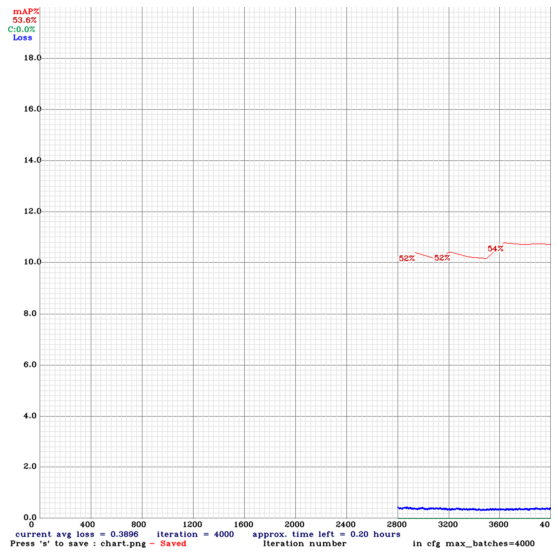

In [ ]:
imShow('chart.png')

In [ ]:
!cp chart.png /mydrive/yolov3/learning_rate/lr0_0001/lr0_0001_chart.png

In the event that the learning is interrupted, the process can be continued using "last.weights" from the backup folder.

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_lr0_0001.cfg /mydrive/yolov3/learning_rate/lr0_0001/backup/yolov3_lr0_0001_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.823975, GIOU: 0.820369), Class: 0.997655, Obj: 0.591960, No Obj: 0.001037, .5R: 1.000000, .75R: 1.000000, count: 3, class_loss = 0.349685, iou_loss = 0.095736, total_loss = 0.445421 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.729569, GIOU: 0.714303), Class: 0.989091, Obj: 0.485407, No Obj: 0.000168, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 0.219711, iou_loss = 0.098478, total_loss = 0.318189 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000020, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.030885, iou_loss = 0.000000, total_loss = 0.030885 
 total_bbox = 83555, rewritten_bbox = 0.061038 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.768906, GIOU: 0.764980), Class: 0.991925, Obj: 0.002386, No Obj: 

# Test Custom YOLOv3 Object Detector

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_lr0_0001.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_lr0_0001.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

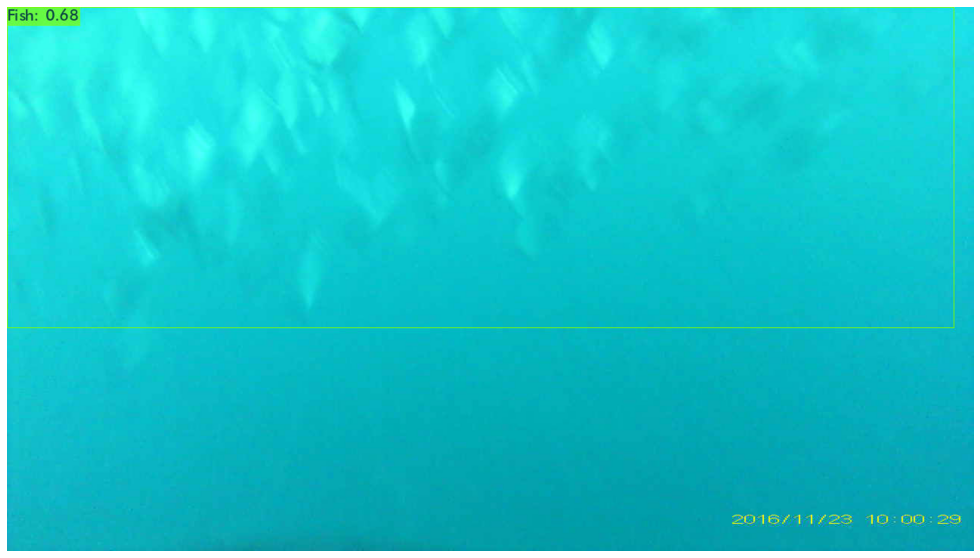

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_lr0_0001.cfg /mydrive/yolov3/learning_rate/lr0_0001/backup/yolov3_lr0_0001_best.weights /mydrive/images/GI-LP0268_11_MOVI0010.avi_image_2016-11-23_10_00_29_56.png -thresh 0.25
imShow('predictions.jpg')

In [ ]:
!./darknet detector map data/obj.data cfg/yolov3_lr0_0001.cfg /mydrive/yolov3/learning_rate/lr0_0001/backup/yolov3_lr0_0001_best.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_lr0_0001.cfg /mydrive/yolov3/learning_rate/lr0_0001/backup/yolov3_lr0_0001_best.weights -dont_show -ext_output -map < data/train.txt> result.txt

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 B

In [ ]:
#save results to drive
!cp ./result.txt /mydrive/yolov3/learning_rate/lr0_0001/result_lr0_0001_train.txt